In [50]:
import inspect
import importlib
import pandas as pd

import helper_function as hf

In [51]:
importlib.reload(hf)

<module 'helper_function' from '/Users/alexdubro/Documents/Programming Tools/TO BE ADDED (GITHUB PORTFOLIO)/Project 2 - /helper_function.py'>

In [52]:
funcs = []
def list_functions(): 
    members = inspect.getmembers(hf)
    functions = [m for m in members if inspect.isfunction(m[1])]
    for name, obj in functions:
        funcs.append(name)
    print(funcs)
list_functions()

['bar_plot', 'bar_plot_comparison', 'count_plot', 'get_basic_info', 'my_fmt', 'set_type', 'show_pie_chart']


In [53]:
data = pd.read_csv('pet_sales.csv')

hf.get_basic_info(data)

The dataframe has 879 rows and 9 columns. Its columns and data types are:
product_id            int64
product_category     object
sales                object
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object.
Here's a hint at what's to come:    product_id product_category     sales   price vendor_id pet_size pet_type  \
0        5040        Equipment  $123,000   94.81   VC_1605    small     fish   
1        4567             Toys   $61,000  120.95   VC_1132    small      cat   
2        4237             Toys  $218,000  106.34    VC_802    small  hamster   
3        4364            Snack   $69,000  241.27    VC_929    large      dog   
4        4184      Supplements  $138,000  133.68    VC_749    large      dog   

   rating  re_buy  
0       7       1  
1      10       0  
2       6       0  
3       1       1  
4      10       0  


In [55]:
data['sales'] = data['sales'].replace('[$,]', '', regex=True)
data = data[data['pet_type'].str.contains('cat|dog|fish|bird') == True]

for column in data.columns:
    hf.set_type(data, column)
    # int, str, int, float, str, str, str, int, bool

## **Data Validation**

The original data is comprised of 879 rows and 9 columns. To validate the data, I went through each column to check that the data matches the criteria in the data dictionary.

The first thing I did was remove rows that should be excluded. The easiest approach was to remove those rows that didn't match the pet types explicitly defined (i.e. must be fish, cat, dog, or bird). Then, I changed values that didn't match specified requirements. For sales, this required removing any formatting (e.g. "$"), and for rebuy, switching 0's and 1's to boolean values of True and False. I now had 833 rows. 

Looking at the remaining columns, I now had the following:

1. Each product ID and vendor ID is unique.
2. There are 11 unique product categories, as expected.
3. There are 5 unique pet sizes, as expected.
4. There are 10 customer ratings, on a 1-10 point scale.

**How many products are being purchased more than once?**

All products are sold more than once. It's important to keep in mind that, overall, products still have greater counts of being sold once: 390, sold more than once; 443, sold once. This can be well represented in a stacked bar graph.

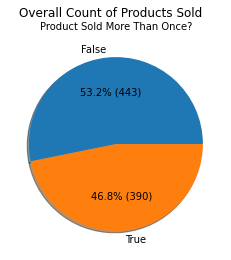

In [56]:
hf.show_pie_chart(data, 're_buy', hf.my_fmt)

Equipment, snack, and toys are sold more than once the most, with 69, 59, and 58 units sold, respectively. The pet store should prioritize these items rather than the least resold item, grooming, which resold 17 units. In fact, equipment was resold 3.5-times as much as grooming.

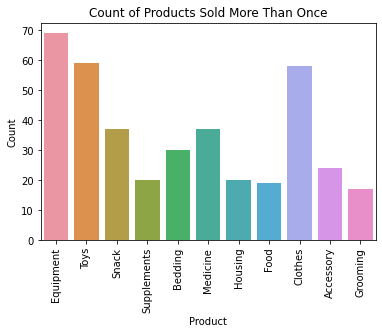

In [57]:
hf.count_plot(data, 'product_category', 're_buy')

**Do the products being purchased again have better sales than others?**

As a whole, products sold more than once have lower sales than products sold once: &dollar;45.6 million relative to &dollar;51.1 million. In other words, products sold once not only accounted for more sales but by a considerable margin: 11.5%.

In fact, of the products sold once, supplements, toys, snack, clothes, and grooming have sales as much as 25% higher. On the other hand, housing and bedding sold higher when being sold more than once, with both selling at around 25% higher. With equipment, snacks, and toys, those differences can rack up considerable sales' differences. For equipment, which is sold more than once, that's &dollar;973,000. For snacks and toys, that's &dollar;2,443,000 and &dollar;2,285,000, respectively.

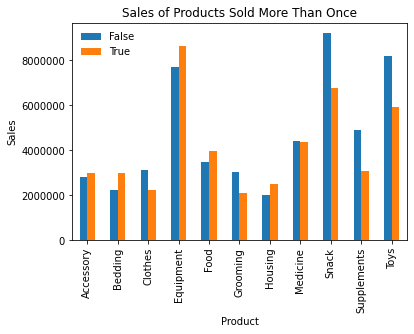

In [58]:
hf.bar_plot(data, 'product_category', 're_buy', 'sales')

**What products are more likely to be purchased again for different types of pets?**

To determine what products are more likely to be purchased again, I wanted to visualize whether and how frequently each product is sold once and more than once for each pet. It's critical to see product counts for each pet when sold once relative to more than once, and which product has counts that are greater for the latter. 

I found that for the following pets, these products had higher counts when being sold more than once:

- Cat: **equipment, food**
- Dog: **accessory, bedding, equipment, food, grooming, medicine**
- Fish: **housing**

For birds, there is no such product.

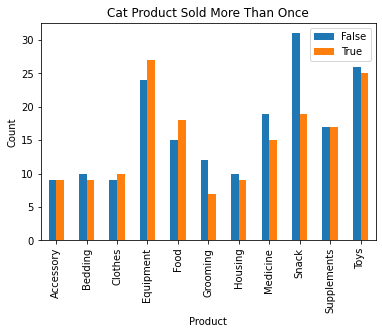

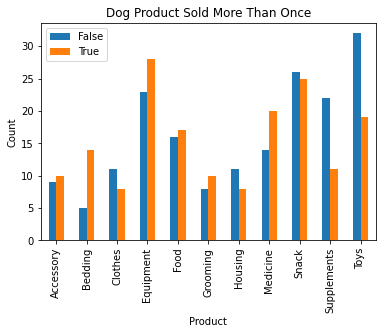

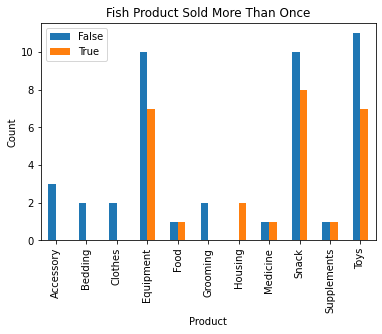

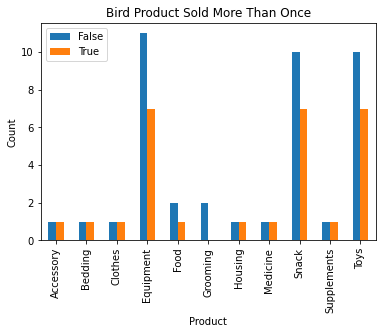

In [59]:
hf.bar_plot_comparison(data, 're_buy', 'pet_type', 'product_category')

The pet store should prioritize, however, one product for each pet. Because dogs have 6 products on that list, it would be inefficient to do otherwise.

The pet store can focus on the following products for each pet, with the net in counts being sold more than once relative to once in parentheses:

- Fish: **Housing** (2 counts)
- Cat: **Equipment** (3 counts)
- Dog: **Bedding** (9 counts)

For birds, it should consider how to increase counts of products sold more than once, particularly for equipment, snack, and toys.